# IBM Data Science Capstone Project

This notebook contains the step by step code for IBM's Data Science Capstone Project. A successful business owner plans to open a hotel in Tallinn, Estonia. Besides providing accomodation facility to visitors, he primarily focuses local community and wants to provide them multicultural food options at a single place. 

The goal is to find the optimal place for such a business plan using an unsupervised machine learning algorithm. Here K-means clustering is used for this purpose.
To achieve this goal, list of neighboorhoods or sub-districts, their geo-coordinates, and top venues in them are required. 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

# !conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

# !conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Required libraries imported')

Required libraries imported


## Creating dataframe that contains names of sub-districts in Tallinn Estonia

In [2]:
data = {'Sub-district':['Aegna','Astangu','Haabersti','Hiiu','Iru','Järve','Juhkentali','Kadaka','Kadriorg','Kakumäe',
                       'Kalamaja','Karjamaa','Kassisaba','Katleri','Keldrimäe','Kelmiküla','Kitseküla','Kivimäe','Kloostrimetsa',
                        'Kompassi','Kopli','Kose','Kurepõllu','Kuristiku','Laagna','Laagri','Laiaküla','Lepiku','Liiva',
                        'Lilleküla','Loopealse','Luite','Maakri','Maarjamäe','Mäeküla','Mähe','Männiku','Merimetsa','Merivälja',
                       'Mõigu','Mustakivi','Mustamäe','Mustjõe','Nõmme','õismäe','Pääsküla','Pae','Paevälja','Paljassaare',
                       'Pelgulinn','Pelguranna','Pikaliiva','Pirita','Priisle','Rahumäe','Raua','Raudalu','Rocca al Mare','Sääse',
                       'Sadama','Seli','Sibulaküla','Siili','Sikupilli','Sitsi','Sõjamäe','Südalinn','Tatari','Tiskre','Tondi',
                       'Tondiraba','Tõnismägi','Torupilli','Ülemiste','Lake Ülemiste','Uus Maailm','Uuslinn','Väike-õismäe',
                       'Vana-Mustamäe','Vanalinn','Väo','Veerenni','Veskimetsa','Vismeistri']}
tallinn_subdists = pd.DataFrame(data, columns = ['Sub-district'])
tallinn_subdists

,Sub-district
0,Aegna
1,Astangu
2,Haabersti
3,Hiiu
4,Iru
5,Järve
6,Juhkentali
7,Kadaka
8,Kadriorg
9,Kakumäe


In [3]:
# Define the dataframe columns
column_names = ['Sub-district', 'Latitude', 'Longitude'] 

# Creating new dataframe
tallinn = pd.DataFrame(columns=column_names)

tallinn

,Sub-district,Latitude,Longitude


## Foursquare API credentials

In [4]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
# print('CLIENT_ID: ' + CLIENT_ID)
# print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:


## Getting coordinates of each sub-district

In [5]:
subdist = tallinn_subdists['Sub-district']
location = None
latitude = None
longitude = None

for data in range(0, len(subdist)):
    dt = subdist[data]
  
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode('{}, Tallinn'.format(dt))
    latitude = location.latitude
    longitude = location.longitude

    tallinn = tallinn.append({ 'Sub-district':dt,'Latitude': location.latitude,'Longitude': location.longitude}, ignore_index=True)

In [6]:
tallinn

,Sub-district,Latitude,Longitude
0,Aegna,59.581319,24.757531
1,Astangu,59.402937,24.630661
2,Haabersti,59.431328,24.629042
3,Hiiu,59.382345,24.672648
4,Iru,59.459188,24.898411
5,Järve,59.398956,24.716329
6,Juhkentali,59.425699,24.770611
7,Kadaka,59.412797,24.677430
8,Kadriorg,59.438466,24.791025
9,Kakumäe,59.453371,24.581699


## Creating map of Tallinn with Folium

In [7]:
# Create map of Tallinn using latitude and longitude values
map_tallinn = folium.Map(location=[latitude, longitude], zoom_start=10)

# Add markers to map
for lat, lng, subdistrict in zip(tallinn['Latitude'], tallinn['Longitude'], tallinn['Sub-district']):
    label = '{}'.format(subdistrict)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tallinn)  
    
map_tallinn

## Function to get all near by venues of each sub-district

In [8]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
#         print(name)
            
        # Create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # Make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # Return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Calling the function to collect venues data

In [9]:
tallinn_venues = getNearbyVenues(names=tallinn['Sub-district'],
                                   latitudes=tallinn['Latitude'],
                                   longitudes=tallinn['Longitude']
                                  )

In [10]:
print(tallinn_venues.shape)

(3331, 7)


In [11]:
tallinn_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aegna,59.581319,24.757531,Kalurikūla Saun,59.581079,24.759631,Campground
1,Aegna,59.581319,24.757531,House of the Blackheads,59.585157,24.764115,Music Venue
2,Aegna,59.581319,24.757531,Põhjarand,59.585501,24.750149,Beach
3,Aegna,59.581319,24.757531,Aegna rändrahnud,59.581938,24.773533,Scenic Lookout
4,Aegna,59.581319,24.757531,Aegna grill,59.572338,24.756646,BBQ Joint


## Counting and grouping by number of venues for each sub-district

In [12]:
tallinn_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Aegna,5,5,5,5,5,5
Astangu,12,12,12,12,12,12
Haabersti,18,18,18,18,18,18
Hiiu,44,44,44,44,44,44
Iru,6,6,6,6,6,6
Juhkentali,80,80,80,80,80,80
Järve,50,50,50,50,50,50
Kadaka,44,44,44,44,44,44
Kadriorg,60,60,60,60,60,60


## Checking number of distinct venue categories

In [13]:
print('There are {} unique categories.'.format(len(tallinn_venues['Venue Category'].unique())))

There are 278 unique categories.


## Analyzing sub-districts

In [14]:
# One hot encoding
tallinn_onehot = pd.get_dummies(tallinn_venues[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
tallinn_onehot['Neighborhood'] = tallinn_venues['Neighborhood'] 

# Move neighborhood column to the first column
fixed_columns = [tallinn_onehot.columns[-1]] + list(tallinn_onehot.columns[:-1])
tallinn_onehot = tallinn_onehot[fixed_columns]

tallinn_onehot.head()

,Zoo Exhibit,ATM,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bakery,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Store,Big Box Store,Bike Shop,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bridge,Buffet,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Cable Car,Cafeteria,Café,Camera Store,Campground,Candy Store,Capitol Building,Car Wash,Casino,Castle,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cruise Ship,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Dive Spot,Dog Run,Donut Shop,Driving School,Eastern European Restaurant,Electronics Store,English Restaurant,Escape Room,Event Space,Exhibit,Fair,Farmers Market,Fast Food Restaurant,Field,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Service,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Spring,Hotel,Hotel Bar,Hotel Pool,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Venue,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Nursery School,Office,Opera House,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Outlet Store,Paintball Field,Palace,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Café,Pet Service,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Playground,Plaza,Pool,Pool Hall,Print Shop,Pub,Rental Car Location,Resort,Restaurant,River,Rock Club,Russian Restaurant,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Ski Area,Ski Trail,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Strip Club,Summer Camp,Supermarket,Sushi Restaurant,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Tourist Information Center,Toy / Game Store,Track,Trail,Train,Train Station,Tram Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Volleyball Court,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [15]:
tallinn_onehot.shape

(3331, 278)

In [16]:
tallinn_grouped = tallinn_onehot.groupby('Neighborhood').mean().reset_index()
tallinn_grouped

,Neighborhood,Zoo Exhibit,ATM,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bakery,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Store,Big Box Store,Bike Shop,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bridge,Buffet,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Cable Car,Cafeteria,Café,Camera Store,Campground,Candy Store,Capitol Building,Car Wash,Casino,Castle,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cruise Ship,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Dive Spot,Dog Run,Donut Shop,Driving School,Eastern European Restaurant,Electronics Store,English Restaurant,Escape Room,Event Space,Exhibit,Fair,Farmers Market,Fast Food Restaurant,Field,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Service,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Spring,Hotel,Hotel Bar,Hotel Pool,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Venue,Nature Preserve,New American Restaurant,Nightclub,Nursery School,Office,Opera House,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Outlet Store,Paintball Field,Palace,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Café,Pet Service,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Playground,Plaza,Pool,Pool Hall,Print Shop,Pub,Rental Car Location,Resort,Restaurant,River,Rock Club,Russian Restaurant,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Ski Area,Ski Trail,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Strip Club,Summer Camp,Supermarket,Sushi Restaurant,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Tourist Information Center,Toy / Game Store,Track,Trail,Train,Train Station,Tram Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Volleyball Court,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Aegna,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [17]:
tallinn_grouped.shape

(84, 278)

## Getting Top 10 venues of each sub-district

In [18]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [19]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = tallinn_grouped['Neighborhood']

for ind in np.arange(tallinn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tallinn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(8)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aegna,Campground,Beach,Scenic Lookout,Music Venue,BBQ Joint,Fast Food Restaurant,Farmers Market,Fair,Exhibit,Flea Market
1,Astangu,Convenience Store,Trail,Middle Eastern Restaurant,Spa,Motorcycle Shop,Bus Station,Bus Stop,Eastern European Restaurant,Grocery Store,Go Kart Track
2,Haabersti,Bus Station,Trail,Bus Stop,Convenience Store,Eastern European Restaurant,Beach,Supermarket,Furniture / Home Store,Museum,Gym / Fitness Center
3,Hiiu,Café,Bus Station,Bus Stop,Pub,Ski Area,Music Venue,Park,Train Station,Restaurant,Modern European Restaurant
4,Iru,Bus Station,Theme Park,Shopping Mall,Cosmetics Shop,Grocery Store,Driving School,Eastern European Restaurant,Electronics Store,English Restaurant,Escape Room
5,Juhkentali,Sushi Restaurant,Restaurant,Hotel,Lounge,Café,Deli / Bodega,Thai Restaurant,Arts & Crafts Store,Grocery Store,Casino
6,Järve,Furniture / Home Store,Café,Eastern European Restaurant,Supermarket,Bus Station,Sporting Goods Shop,Park,Tennis Court,Bus Stop,Restaurant
7,Kadaka,Supermarket,Café,Shopping Mall,Movie Theater,Pizza Place,Gym,Electronics Store,Sporting Goods Shop,Fast Food Restaurant,Jewelry Store


## Clustering neighbourhoods by using Machine Learning

K-means method is applied for clustering. Let's first find out the optimal number of clusters by using silhouette scores graph.

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [21]:
max_range = 10

tallinn_grouped_clustering = tallinn_grouped.drop('Neighborhood', 1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = tallinn_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

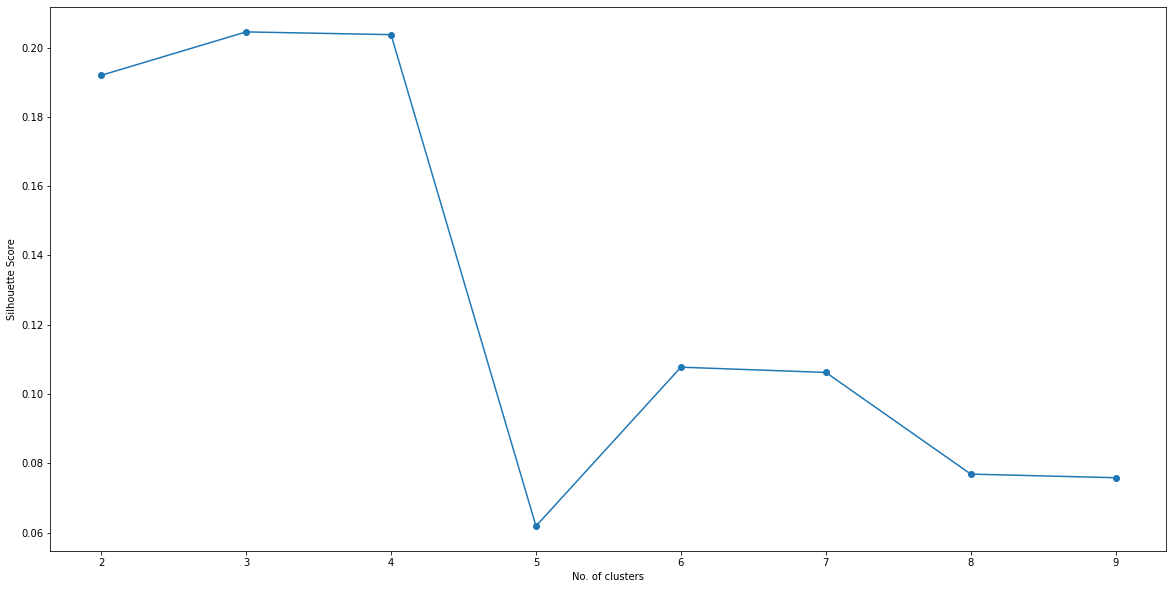

In [22]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

As we can see from the graph that the optimal number of clusters is 3 which we will use to run K-means clustering.

In [23]:
# Run k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(tallinn_grouped_clustering)

# Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 0, 1, 0, 1, 1, 1, 1, 2], dtype=int32)

Let's create a new dataframe that includes the cluster and top 10 venues of each category.

In [24]:
tallinn.rename(columns={'Sub-district':'Neighborhood'}, inplace=True)
tallinn.head()

,Neighborhood,Latitude,Longitude
0,Aegna,59.581319,24.757531
1,Astangu,59.402937,24.630661
2,Haabersti,59.431328,24.629042
3,Hiiu,59.382345,24.672648
4,Iru,59.459188,24.898411


In [25]:
# Add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

tallinn_merged = tallinn

# Merge budapest_grouped with budapest_data to add latitude/longitude for each neighborhood
tallinn_merged = tallinn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

tallinn_merged

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aegna,59.581319,24.757531,2,Campground,Beach,Scenic Lookout,Music Venue,BBQ Joint,Fast Food Restaurant,Farmers Market,Fair,Exhibit,Flea Market
1,Astangu,59.402937,24.630661,0,Convenience Store,Trail,Middle Eastern Restaurant,Spa,Motorcycle Shop,Bus Station,Bus Stop,Eastern European Restaurant,Grocery Store,Go Kart Track
2,Haabersti,59.431328,24.629042,0,Bus Station,Trail,Bus Stop,Convenience Store,Eastern European Restaurant,Beach,Supermarket,Furniture / Home Store,Museum,Gym / Fitness Center
3,Hiiu,59.382345,24.672648,1,Café,Bus Station,Bus Stop,Pub,Ski Area,Music Venue,Park,Train Station,Restaurant,Modern European Restaurant
4,Iru,59.459188,24.898411,0,Bus Station,Theme Park,Shopping Mall,Cosmetics Shop,Grocery Store,Driving School,Eastern European Restaurant,Electronics Store,English Restaurant,Escape Room
5,Järve,59.398956,24.716329,1,Furniture / Home Store,Café,Eastern European Restaurant,Supermarket,Bus Station,Sporting Goods Shop,Park,Tennis Court,Bus Stop,Restaurant
6,Juhkentali,59.425699,24.770611,1,Sushi Restaurant,Restaurant,Hotel,Lounge,Café,Deli / Bodega,Thai Restaurant,Arts & Crafts Store,Grocery Store,Casino
7,Kadaka,59.412797,24.677430,1,Supermarket,Café,Shopping Mall,Movie Theater,Pizza Place,Gym,Electronics Store,Sporting Goods Shop,Fast Food Restaurant,Jewelry Store
8,Kadriorg,59.438466,24.791025,1,Café,Restaurant,Park,Beach,Grocery Store,Museum,Spa,Art Museum,Palace,Lounge
9,Kakumäe,59.453371,24.581699,2,Dessert Shop,Bus Station,Athletics & Sports,Beach,Scenic Lookout,Field,Fast Food Restaurant,Farmers Market,Film Studio,Eastern European Restaurant


## Visualizing the clusters

In [26]:
# Create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tallinn_merged['Latitude'], tallinn_merged['Longitude'], tallinn_merged['Neighborhood'], tallinn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Cluster evaluation

### Cluster 0

In [27]:
tallinn_merged.loc[tallinn_merged['Cluster Labels'] == 0, tallinn_merged.columns[[0] + list(range(4, tallinn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Astangu,Convenience Store,Trail,Middle Eastern Restaurant,Spa,Motorcycle Shop,Bus Station,Bus Stop,Eastern European Restaurant,Grocery Store,Go Kart Track
2,Haabersti,Bus Station,Trail,Bus Stop,Convenience Store,Eastern European Restaurant,Beach,Supermarket,Furniture / Home Store,Museum,Gym / Fitness Center
4,Iru,Bus Station,Theme Park,Shopping Mall,Cosmetics Shop,Grocery Store,Driving School,Eastern European Restaurant,Electronics Store,English Restaurant,Escape Room
13,Katleri,Bus Station,Athletics & Sports,Restaurant,Playground,Furniture / Home Store,Toy / Game Store,Grocery Store,Beach,Gym / Fitness Center,Market
17,Kivimäe,Bus Station,Pharmacy,Office,Toy / Game Store,Grocery Store,Trail,Cable Car,Train Station,Bus Stop,Music Venue
18,Kloostrimetsa,Botanical Garden,Bus Station,Convenience Store,Garden,Electronics Store,English Restaurant,Escape Room,Event Space,Exhibit,Fair
21,Kose,Café,Market,Bus Station,Park,Restaurant,Beach,Volleyball Court,Moving Target,Trail,Bus Stop
33,Maarjamäe,Soccer Field,Bus Station,Trail,Athletics & Sports,Park,Pharmacy,Resort,River,Burger Joint,Mini Golf
34,Mäeküla,Flower Shop,Trail,Diner,Automotive Shop,Exhibit,Eastern European Restaurant,Electronics Store,English Restaurant,Escape Room,Event Space
45,Pääsküla,Bus Station,Trail,Food & Drink Shop,Shoe Store,Garden Center,Convenience Store,Cable Car,Fast Food Restaurant,Playground,Skate Park


### Cluster 1

In [28]:
tallinn_merged.loc[tallinn_merged['Cluster Labels'] == 1, tallinn_merged.columns[[0] + list(range(4, tallinn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Hiiu,Café,Bus Station,Bus Stop,Pub,Ski Area,Music Venue,Park,Train Station,Restaurant,Modern European Restaurant
5,Järve,Furniture / Home Store,Café,Eastern European Restaurant,Supermarket,Bus Station,Sporting Goods Shop,Park,Tennis Court,Bus Stop,Restaurant
6,Juhkentali,Sushi Restaurant,Restaurant,Hotel,Lounge,Café,Deli / Bodega,Thai Restaurant,Arts & Crafts Store,Grocery Store,Casino
7,Kadaka,Supermarket,Café,Shopping Mall,Movie Theater,Pizza Place,Gym,Electronics Store,Sporting Goods Shop,Fast Food Restaurant,Jewelry Store
8,Kadriorg,Café,Restaurant,Park,Beach,Grocery Store,Museum,Spa,Art Museum,Palace,Lounge
10,Kalamaja,Restaurant,Burger Joint,Wine Bar,Park,Beer Bar,Bakery,Café,Bar,Theater,Scenic Lookout
11,Karjamaa,Bakery,Bar,Burger Joint,Bus Stop,Supermarket,Flea Market,Lounge,Eastern European Restaurant,Restaurant,Boat or Ferry
12,Kassisaba,Café,Restaurant,Hotel,Park,Scenic Lookout,Coffee Shop,Eastern European Restaurant,Wine Bar,Pub,Asian Restaurant
14,Keldrimäe,Restaurant,Café,Sushi Restaurant,Hotel,Gym / Fitness Center,Cosmetics Shop,Liquor Store,Salon / Barbershop,Casino,Grocery Store
15,Kelmiküla,Wine Bar,Restaurant,Hotel,Park,Scenic Lookout,Burger Joint,Eastern European Restaurant,Café,Vegetarian / Vegan Restaurant,Beer Bar


### Cluster 2

In [29]:
tallinn_merged.loc[tallinn_merged['Cluster Labels'] == 2, tallinn_merged.columns[[0] + list(range(4, tallinn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aegna,Campground,Beach,Scenic Lookout,Music Venue,BBQ Joint,Fast Food Restaurant,Farmers Market,Fair,Exhibit,Flea Market
9,Kakumäe,Dessert Shop,Bus Station,Athletics & Sports,Beach,Scenic Lookout,Field,Fast Food Restaurant,Farmers Market,Film Studio,Eastern European Restaurant
26,Laiaküla,Scenic Lookout,Restaurant,Bus Station,Smoke Shop,Trail,Bus Stop,Zoo,Eastern European Restaurant,Electronics Store,English Restaurant
27,Lepiku,Scenic Lookout,Restaurant,Smoke Shop,Trail,Bus Stop,Zoo,English Restaurant,Driving School,Eastern European Restaurant,Electronics Store
35,Mähe,Moving Target,Outdoors & Recreation,Food Service,Bus Station,Scenic Lookout,Eastern European Restaurant,Electronics Store,English Restaurant,Escape Room,Event Space
38,Merivälja,Scenic Lookout,Bus Station,Restaurant,Bakery,Park,Pizza Place,Bus Stop,Supermarket,Bar,Café
52,Pirita,Restaurant,Scenic Lookout,Bus Stop,Botanical Garden,Smoke Shop,Garden,River,Trail,English Restaurant,Eastern European Restaurant


## Conclusion

Looking into the cluster data, one can figure out that cluster 1 is the most suitable option. If we look deep into the map, center of this cluster is more populated. Based on this, we can suggest the business owner to open his hotel in the heart of cluster 1.